<a href="https://colab.research.google.com/github/juelha/IANNWTF/blob/sabine/Homework_05_Sabine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Data set
As CNNs are very fashionable, in this week we would like you to work with the Fashion
MNIST Dataset.
Note that this is very similar to the MNIST dataset that you have already seen in
notebooks on courseware. The images have the same shape and there are the same
number of classes.
1.1 Construct a Data Pipeline
Make yourself familiar with the dataset and construct a Data Pipeline. Perform all the
preprocessing steps that you deem necessary. 12


In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# normalise pixel values 
train_images = train_images /  255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

# 2 Model and Training
Although the basic procedure of defining a CNN Model is the same, you will need to
use entirely different layers this week. We want you to experiment a bit with how to
structure your CNN but here are some general hints:
• You may want to alternate between convolutional layers and pooling layers. 3
• Find the middle ground between the depth of the network and the number of filters
used in each layer. Maybe consider the idea of the receptive field when deciding
on the parameters. 4
• Find the right parameters for the layers.5
• As this is an image classification task, make sure to have a classifier architecture
following your convolutional and pooling operations. 6


Start by training your network for 10 epochs using a learning rate of 0.1. You can
again copy most of the training procedure from previous scripts. 7 You may use all the
optimization and regularization techniques that you wish and find applicable.
To pass this task, achieve at least an accuracy of 85% on the test dataset. 8


In [30]:
# Model

model = keras.models.Sequential()
layers = keras.layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.summary()


# add dense layers on top to classify the output of the above Conv2D layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))



Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4974 - accuracy: 0.8170 - val_loss: 0.3624 - val_accuracy: 0.8714
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3185 - accuracy: 0.8845 - val_loss: 0.3300 - val_accuracy: 0.8807
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2723 - accuracy: 0.9004 - val_loss: 0.2803 - val_accuracy: 0.8997
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2406 - accuracy: 0.9111 - val_loss: 0.2755 - val_accuracy: 0.8992
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2168 - accuracy: 0.9192 - val_loss: 0.2707 - val_accuracy: 0.9012
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1967 - accuracy: 0.9266 - val_loss: 0.2817 - val_accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1775 - accuracy: 0.9329 - val_loss: 0.2635 - val_ac

#4 Visualization
Visualize accuracy and loss for training and test data using matplotlib.


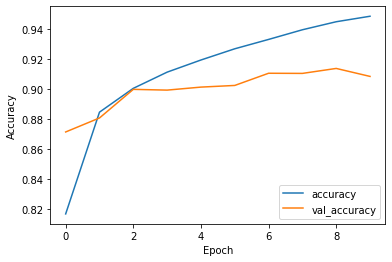

In [36]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')